This notebook aims to clusturise departments in metropolitan France using crimes and misdemeanors data

In [11]:
import warnings
warnings.filterwarnings("ignore")
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [12]:
security_df = pd.read_csv('full_dataset_normalized.csv',sep=",")
security_df['code_dep'] = security_df['code_dep'].astype(str)
codes_a_supprimer = ['971', '972', '973', '974', 'France_Métro']
security_df = security_df[~security_df['code_dep'].isin(codes_a_supprimer)]

In [13]:
security_df_selected_columns = security_df[['Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population', 'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       "Irégularités de Main-d'oeuvre_per_population", "code_dep"]]

In [14]:
security_df_selected_columns_by_dept = security_df_selected_columns.groupby('code_dep').mean().reset_index()

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

colonnes_pca = ['Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population', 'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       "Irégularités de Main-d'oeuvre_per_population"]


donnees_pca = security_df_selected_columns_by_dept[colonnes_pca]
donnees_pca_standardisees = StandardScaler().fit_transform(donnees_pca)

# Application de la PCA
pca = PCA()
resultats_pca = pca.fit(donnees_pca_standardisees)

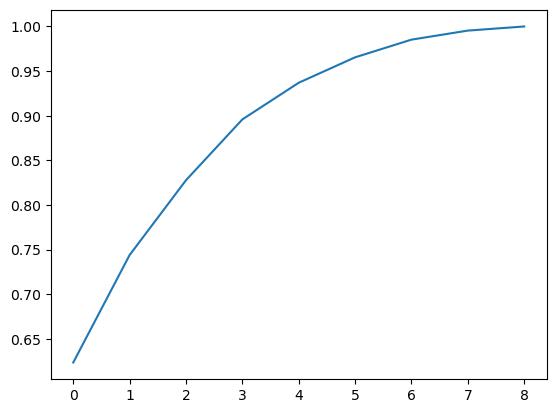

In [16]:
plt.plot(np.cumsum(resultats_pca.explained_variance_ratio_))

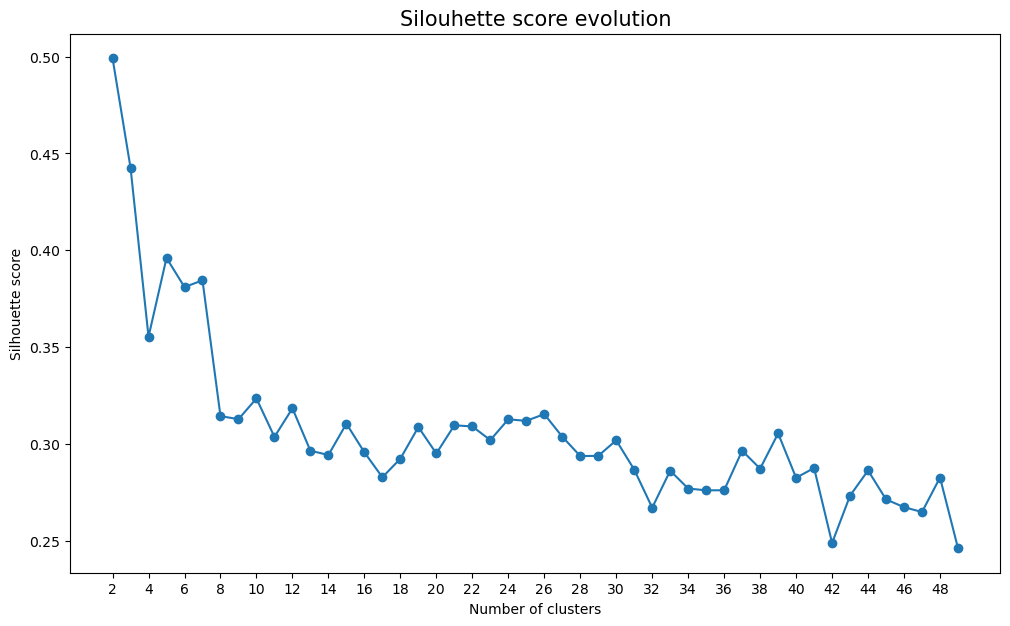

In [17]:
resultats_pca_df = pd.DataFrame(resultats_pca.transform(donnees_pca_standardisees)[:, :3], columns=['PCA1', 'PCA2', 'PCA3'])
resultats_pca_df['dept'] = security_df_selected_columns_by_dept['code_dep']

best_nb_cluster = tools.best_nb_cluster(
        resultats_pca_df,
        ['PCA1', 'PCA2', 'PCA3'],
        2,
        50,
        True,
        "Silouhette score evolution"
)

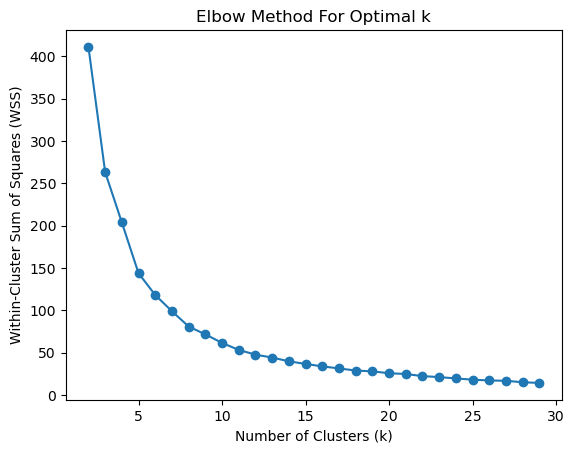

In [18]:
from sklearn.cluster import KMeans
                 
feature_columns = ['PCA1', 'PCA2', 'PCA3']
X = resultats_pca_df[feature_columns].values

wss_values = []

k_values = range(2, 30)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wss_values.append(kmeans.inertia_)

# Plot the curve of WSS versus the number of clusters (k)
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()

In [26]:
dic_reorder_2, labels_2 = tools.clustering(resultats_pca_df,
                 ['PCA1', 'PCA2', 'PCA3'],
                 2, order=True)

dic_reorder_3, labels_3 = tools.clustering(resultats_pca_df,
                 ['PCA1', 'PCA2', 'PCA3'],
                 3, order=True)

dic_reorder_5, labels_5 = tools.clustering(resultats_pca_df,
                 ['PCA1', 'PCA2', 'PCA3'],
                 5, order=True)

KeyError: 'id'

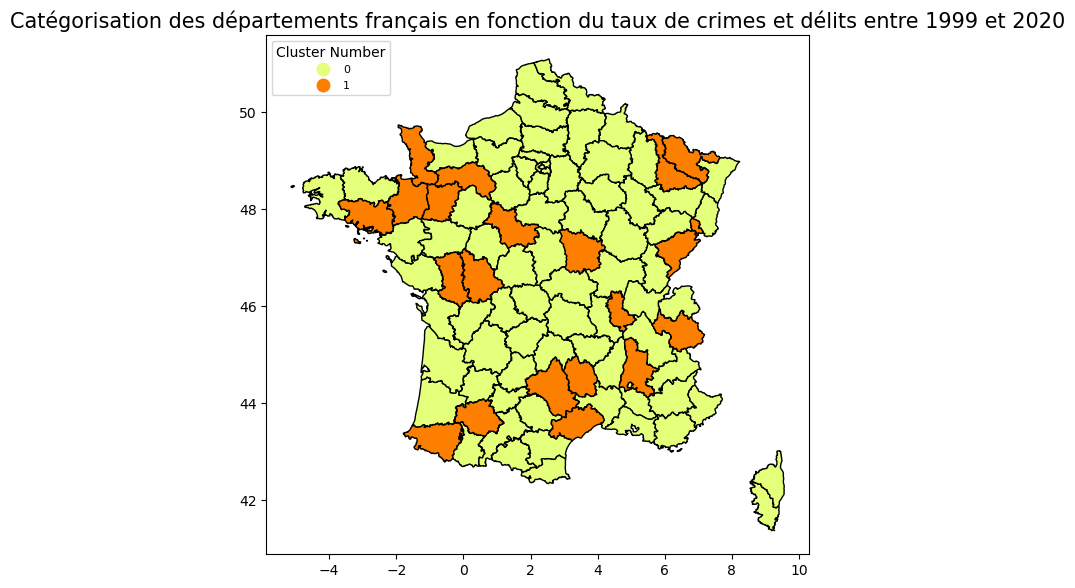

In [27]:
tools.visualize_clusters_map(cluster_labels=labels_2, title='Catégorisation des départements français en fonction du taux de crimes et délits entre 1999 et 2020', dic_reorder=dic_reorder_2)


KeyError: 'id'

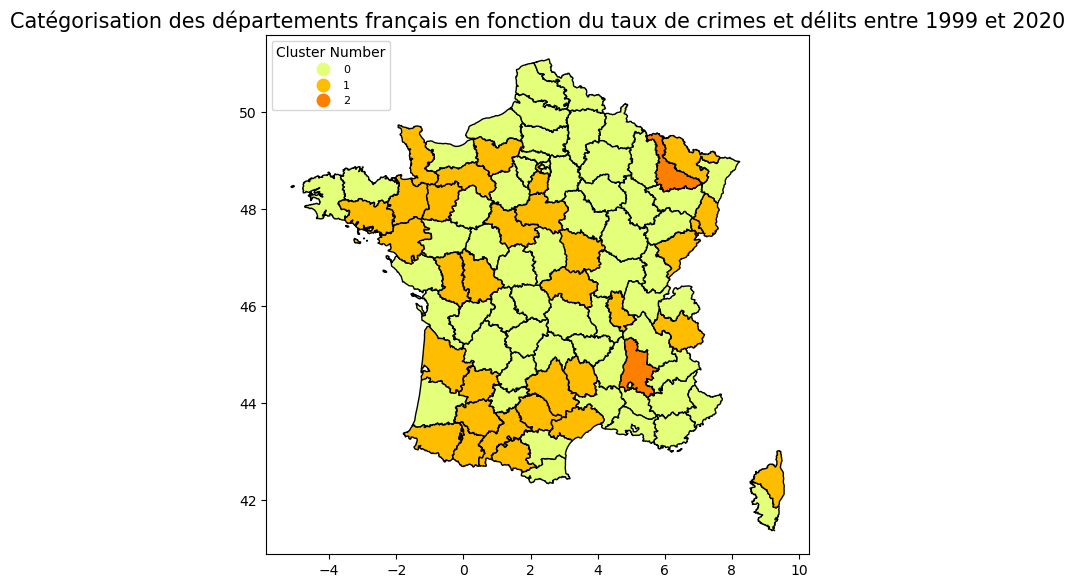

In [20]:
tools.visualize_clusters_map(cluster_labels=labels_3, title='Catégorisation des départements français en fonction du taux de crimes et délits entre 1999 et 2020', dic_reorder=dic_reorder_3)

KeyError: 'id'

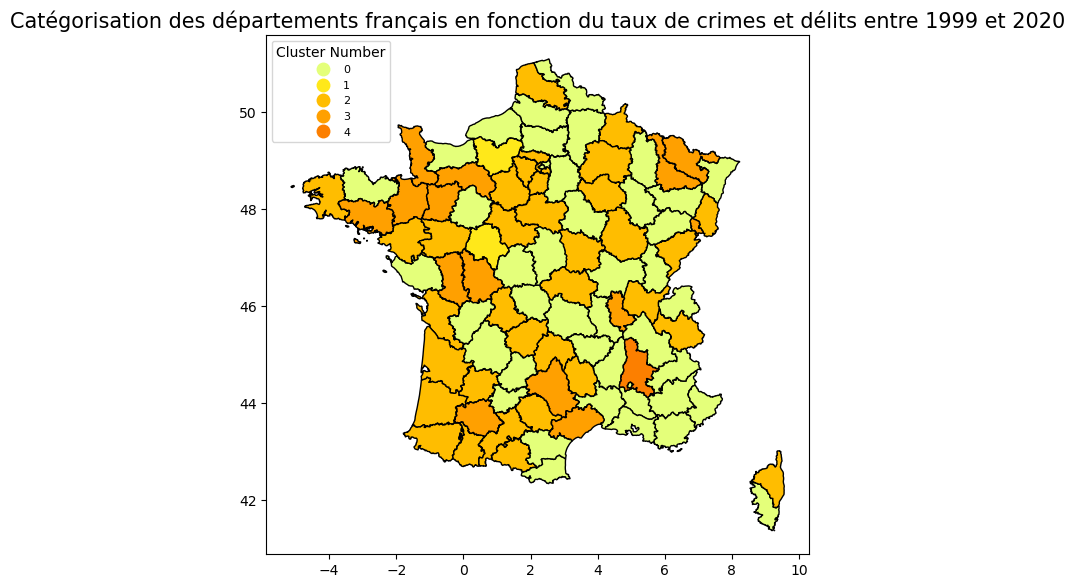

In [21]:
tools.visualize_clusters_map(cluster_labels=labels_5, title='Catégorisation des départements français en fonction du taux de crimes et délits entre 1999 et 2020', dic_reorder=dic_reorder_5)

In [22]:
# departements_geojson_name = 'departements.geojson'
# gdf_departements = gpd.read_file(departements_geojson_name)
# 
# # Fusionner seulement la colonne "Cluster" dans le GeoDataFrame
# gdf_departements['Cluster'] = gdf_departements['code'].astype(str).map(resultats_pca_df.set_index('dept')['Cluster'])
# 
# # Plotting
# plt.figure(figsize=(12, 8))
# 
# vmin, vmax = gdf_departements['Cluster'].min(), gdf_departements['Cluster'].max()
# 
# # Tracer les départements avec différentes couleurs en fonction du label
# gdf_departements.plot(column='Cluster', cmap='Wistia', legend=True, vmin=vmin, vmax=vmax)
# 
# # Ajouter un titre
# plt.title("Carte des départements avec couleur en fonction du label")
# 
# # Afficher la carte
# plt.show()

KeyError: 'Cluster'